# Analysis of world crime

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warnings (as always)


import plotly.figure_factory as ff
import plotly.offline as py
##for online plotting use import plotly.plotly as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)

# US States Analysis
Now let us load an US data set containing 4 types of violent crime in major US cities (cities with over 250 000 citizens). This should serve as a templete to an (almost) perfect data set that we need to find. We have 40 years of data, there are 4 types of different crimes reported all through out the year. Further more we have clearly distinct areas with additional number of population for each area.

In [3]:
df = pd.read_csv('/content/report.csv')


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2829 entries, 0 to 2828
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   report_year          2829 non-null   int64  
 1   agency_code          2788 non-null   object 
 2   agency_jurisdiction  2829 non-null   object 
 3   population           2760 non-null   float64
 4   violent_crimes       2794 non-null   float64
 5   homicides            2795 non-null   float64
 6   rapes                2754 non-null   float64
 7   assaults             2753 non-null   float64
 8   robberies            2754 non-null   float64
 9   months_reported      2692 non-null   float64
 10  crimes_percapita     2794 non-null   float64
 11  homicides_percapita  2795 non-null   float64
 12  rapes_percapita      2754 non-null   float64
 13  assaults_percapita   2753 non-null   float64
 14  robberies_percapita  2754 non-null   float64
dtypes: float64(12), int64(1), object(2)
me

In [7]:
df.describe()

,report_year,population,violent_crimes,homicides,rapes,assaults,robberies,months_reported,crimes_percapita,homicides_percapita,rapes_percapita,assaults_percapita,robberies_percapita
count,2829.000000,2.760000e+03,2.794000e+03,2795.000000,2754.000000,2753.000000,2754.000000,2692.000000,2794.000000,2795.000000,2754.000000,2753.000000,2754.000000
mean,1995.000000,7.956981e+05,2.963255e+04,398.385331,416.278867,4405.146023,4000.245098,11.868871,1093.049810,15.372812,59.305167,566.595434,459.968112
std,11.834251,1.012451e+06,1.728630e+05,2281.276402,479.811934,6977.293769,8653.902965,1.118194,676.884678,12.350640,31.971570,369.436996,340.903534
min,1975.000000,1.007630e+05,1.540000e+02,1.000000,15.000000,15.000000,83.000000,0.000000,16.490000,0.210000,1.640000,1.610000,11.460000
25%,1985.000000,3.779310e+05,3.014750e+03,32.000000,176.250000,1467.000000,1032.000000,12.000000,625.082500,6.955000,35.775000,319.090000,210.242500
50%,1995.000000,5.366145e+05,5.135500e+03,64.000000,291.000000,2597.000000,1940.000000,12.000000,949.680000,11.980000,55.900000,487.480000,374.400000
75%,2005.000000,8.168558e+05,9.058500e+03,131.000000,465.000000,4556.000000,3609.750000,12.000000,1409.507500,20.230000,77.797500,728.240000,612.005000
max,2015.000000,8.550861e+06,1.932274e+06,24703.000000,3899.000000,71030.000000,107475.000000,12.000000,4352.830000,94.740000,199.300000,2368.220000,2337.520000


In [4]:
df.head()

,report_year,agency_code,agency_jurisdiction,population,violent_crimes,homicides,rapes,assaults,robberies,months_reported,crimes_percapita,homicides_percapita,rapes_percapita,assaults_percapita,robberies_percapita
0,1975,NM00101,"Albuquerque, NM",286238.0,2383.0,30.0,181.0,1353.0,819.0,12.0,832.52,10.48,63.23,472.68,286.13
1,1975,TX22001,"Arlington, TX",112478.0,278.0,5.0,28.0,132.0,113.0,12.0,247.16,4.45,24.89,117.36,100.46
2,1975,GAAPD00,"Atlanta, GA",490584.0,8033.0,185.0,443.0,3518.0,3887.0,12.0,1637.44,37.71,90.30,717.10,792.32
3,1975,CO00101,"Aurora, CO",116656.0,611.0,7.0,44.0,389.0,171.0,12.0,523.76,6.00,37.72,333.46,146.58
4,1975,TX22701,"Austin, TX",300400.0,1215.0,33.0,190.0,463.0,529.0,12.0,404.46,10.99,63.25,154.13,176.10


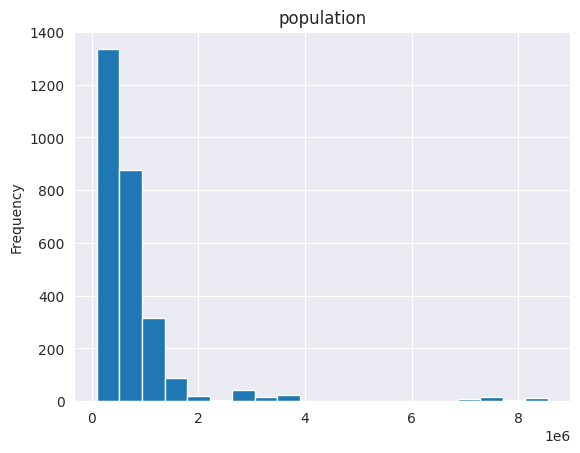

In [24]:
# @title population

df['population'].plot(kind='hist', bins=20, title='population')
plt.gca().spines[['top', 'right',]].set_visible(False)

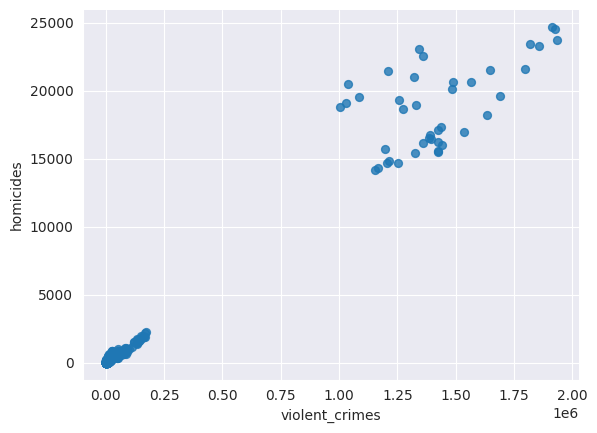

In [23]:

df.plot(kind='scatter', x='violent_crimes', y='homicides', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

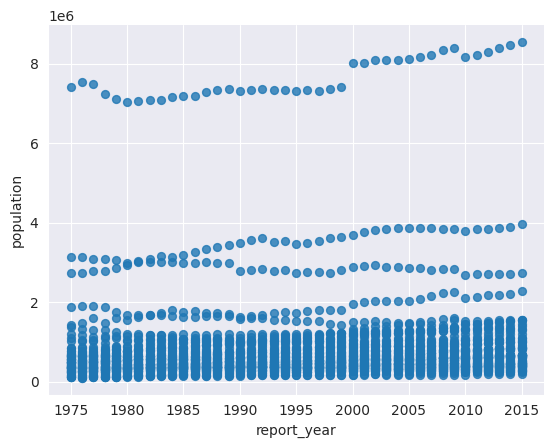

In [9]:
# @title report_year vs population

df.plot(kind='scatter', x='report_year', y='population', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

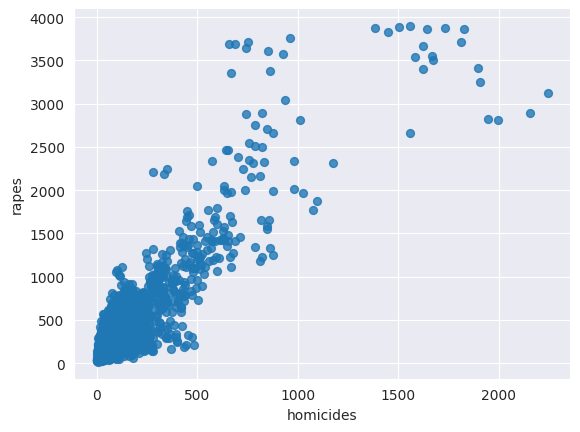

In [11]:
# @title homicides vs rapes

df.plot(kind='scatter', x='homicides', y='rapes', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

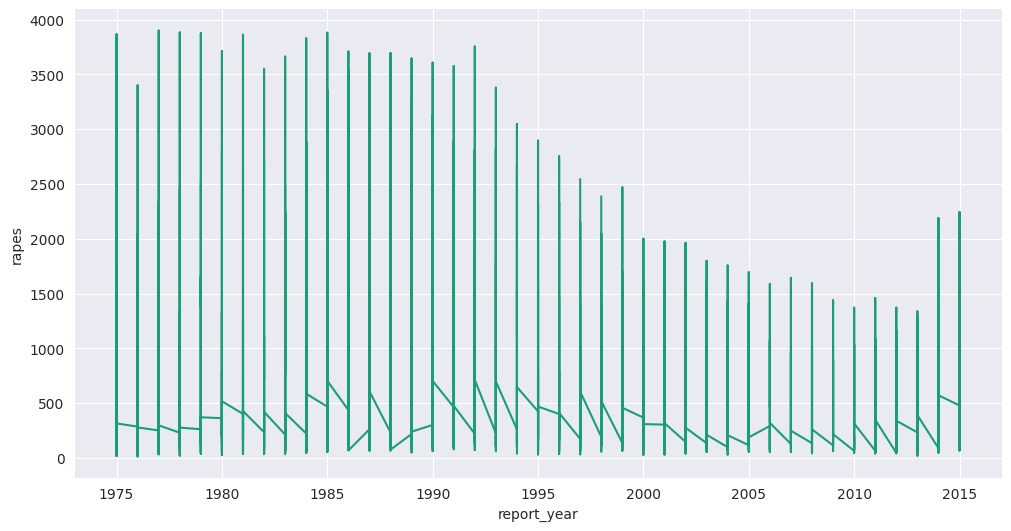

In [10]:
# @title report_year vs rapes

def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['report_year']
  ys = series['rapes']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('report_year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('report_year')
_ = plt.ylabel('rapes')

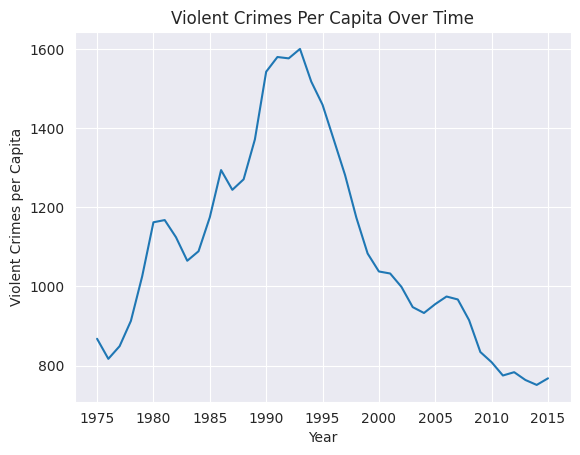

In [8]:
# @title Violent Crimes Per Capita Over Time



# Group the data by year and calculate the mean crimes per capita
crimes_by_year = df.groupby('report_year')['crimes_percapita'].mean()

# Create the line chart
plt.plot(crimes_by_year.index, crimes_by_year.values)
plt.xlabel('Year')
plt.ylabel('Violent Crimes per Capita')
_ = plt.title('Violent Crimes Per Capita Over Time')

#  Total number of crimes in US during in 40 years

In [15]:


total_crimes = df['violent_crimes'].sum()
print(f"Total number of crimes in US during in 40 years: {total_crimes}")


Total number of crimes in US during in 40 years: 82793331.0
